In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.optimize as opt
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

In [79]:
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [80]:
del df['G1']
del df['G2']

In [81]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


In [82]:
X = df.loc[:,df.columns != 'G3']
Y = df.loc[:,df.columns == 'G3']

In [83]:
temp_objt = X.select_dtypes(include='object')
temp_objt.head()
X_temp = pd.get_dummies(temp_objt)
X_temp.head()
X_temp.columns

Index(['school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [84]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [86]:
X.drop(X.select_dtypes(['object']), inplace=True, axis=1)


C:\Users\VisualBI\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 13 columns):
age           395 non-null int64
Medu          395 non-null int64
Fedu          395 non-null int64
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
dtypes: int64(13)
memory usage: 40.2 KB


In [88]:
new_X = pd.concat([X,X_temp],axis=1)

In [89]:
new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 56 columns):
age                  395 non-null int64
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc                 395 non-null int64
Walc                 395 non-null int64
health               395 non-null int64
absences             395 non-null int64
school_GP            395 non-null uint8
school_MS            395 non-null uint8
sex_F                395 non-null uint8
sex_M                395 non-null uint8
address_R            395 non-null uint8
address_U            395 non-null uint8
famsize_GT3          395 non-null uint8
famsize_LE3          395 non-null uint8
Pstatus_A            395 non-null uint8
Pstatus_T      

In [90]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [91]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(new_X, Y)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.8min finished
C:\Users\VisualBI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [92]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
rfe_estimation = RFE(rf,n_features_to_select=10)
rfe_estimation = rfe_estimation.fit(new_X, Y)

C:\Users\VisualBI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
rfe_estimation.get_support
features_bool = np.array(rfe_estimation.support_)
features = np.array(new_X.columns)
result = features[features_bool]
print(result)

['age' 'Medu' 'studytime' 'failures' 'famrel' 'freetime' 'goout' 'Walc'
 'health' 'absences']


In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [21]:
df_10 = df[['age', 'Medu', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Walc', 'health', 'absences']].copy()

In [22]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 10 columns):
age          395 non-null int64
Medu         395 non-null int64
studytime    395 non-null int64
failures     395 non-null int64
famrel       395 non-null int64
freetime     395 non-null int64
goout        395 non-null int64
Walc         395 non-null int64
health       395 non-null int64
absences     395 non-null int64
dtypes: int64(10)
memory usage: 30.9 KB


In [23]:
df_10.describe()

,age,Medu,studytime,failures,famrel,freetime,goout,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.035443,0.334177,3.944304,3.235443,3.108861,2.291139,3.554430,5.708861
std,1.276043,1.094735,0.839240,0.743651,0.896659,0.998862,1.113278,1.287897,1.390303,8.003096
min,15.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,0.000000,4.000000,3.000000,3.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,2.000000,0.000000,5.000000,4.000000,4.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [24]:
################ binary classification of G3 i.e target variable #########
def f(row):
    if row['G3'] > 10 :
        val = 1
    else:
        val = 0
    return val
df['Grade'] = df.apply(f, axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,10,0


In [25]:
## We select the 10 features derived after feature selection technique instead of random selection
## Splitting the data into X and Y

In [26]:
X = df_10[['age', 'Medu', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Walc', 'health', 'absences']]
Y= df['Grade']
## Randomly grouping data into train and test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 5)

Text(0,0.5,'absences')

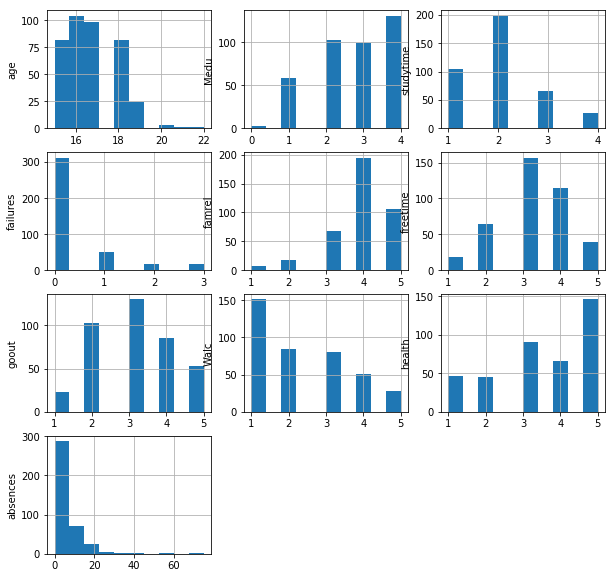

In [44]:
## The Data is clean as there are no null values
## Plotting Histograms for the variables to see the distribution of data
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.title('Histograms')
plt.subplot(4,3,1)
df['age'].hist()
plt.ylabel('age')
plt.subplot(4,3,2)
df['Medu'].hist()
plt.ylabel('Medu')
plt.subplot(4,3,3)
df['studytime'].hist()
plt.ylabel('studytime')
plt.subplot(4,3,4)
df['failures'].hist()
plt.ylabel('failures')
plt.subplot(4,3,5)
df['famrel'].hist()
plt.ylabel('famrel')
plt.subplot(4,3,6)
df['freetime'].hist()
plt.ylabel('freetime')
plt.subplot(4,3,7)
df['goout'].hist()
plt.ylabel('goout')
plt.subplot(4,3,8)
df['Walc'].hist()
plt.ylabel('Walc')
plt.subplot(4,3,9)
df['health'].hist()
plt.ylabel('health')
plt.subplot(4,3,10)
df['absences'].hist()
plt.ylabel('absences')

In [45]:
### SCALING 
## Few variables are skewed and have outliers. Hence, we perform various types of scaling to check which gives the best results 
## for a linear regression 

In [46]:
## Without Scaling
linreg1 = LinearRegression().fit(X_train, y_train)
print('The training score without scaling is :',linreg1.score(X_train, y_train))
print('The testing score without scaling is :',linreg1.score(X_test, y_test))
print(" ")

# Normalization
normalized_X_train = normalize(X_train)
normalized_X_test = normalize(X_test)
linreg2 = LinearRegression().fit(normalized_X_train, y_train)
print('The training score with normalization is :',linreg2.score(normalized_X_train, y_train))
print('The testing score with normalization is',linreg2.score(normalized_X_test, y_test))
print(" ")

# MinMax Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linreg3 = LinearRegression().fit(X_train_scaled, y_train)
print('The training score with MinMax Scaler is',linreg3.score(X_train_scaled, y_train))
print('The testing score with MinMax Scaler is',linreg3.score(X_test_scaled, y_test))
print(" ")

# Standardized
standardized_X_train = scale(X_train)
standardized_X_test = scale(X_test)
linreg4 = LinearRegression().fit(standardized_X_train, y_train)
print('The training score with Standardization  is',linreg4.score(standardized_X_train, y_train))
print('The testing score with Standardization  is',linreg4.score(standardized_X_test, y_test))
print(" ")

The training score without scaling is : 0.15638326100295363
The testing score without scaling is : 0.031156135484795677
 
The training score with normalization is : 0.15901409890395124
The testing score with normalization is 0.03729454204864402
 
The training score with MinMax Scaler is 0.15638326100295374
The testing score with MinMax Scaler is 0.031156135484794678
 
The training score with Standardization  is 0.15638326100295374
The testing score with Standardization  is 0.03569221995251648
 


In [47]:
## As the accuracy of Normalization is better than the other scaling techniques, we will use the normalized train and test 
##  dataset to run out Classification algorithms

In [51]:
## renaming normalized variables back to X_train and X_test 
X_train = normalized_X_train
X_test = normalized_X_test

X_train.shape
y_train.shape

(296, 10)

In [52]:

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [53]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
# from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

C:\Users\VisualBI\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform"

Epoch 1/20
207/207 [==============================] - 1s 3ms/step - loss: 0.6933 - acc: 0.4879
Epoch 2/20
207/207 [==============================] - 0s 143us/step - loss: 0.6930 - acc: 0.5314
Epoch 3/20
207/207 [==============================] - 0s 139us/step - loss: 0.6929 - acc: 0.5314
Epoch 4/20
207/207 [==============================] - 0s 155us/step - loss: 0.6928 - acc: 0.5314
Epoch 5/20
207/207 [==============================] - 0s 116us/step - loss: 0.6926 - acc: 0.5314
Epoch 6/20
207/207 [==============================] - 0s 166us/step - loss: 0.6924 - acc: 0.5314
Epoch 7/20
207/207 [==============================] - 0s 122us/step - loss: 0.6923 - acc: 0.5314
Epoch 8/20
207/207 [==============================] - 0s 212us/step - loss: 0.6921 - acc: 0.5314
Epoch 9/20
207/207 [==============================] - 0s 198us/step - loss: 0.6919 - acc: 0.5314
Epoch 10/20
207/207 [==============================] - 0s 168us/step - loss: 0.6918 - acc: 0.5314
Epoch 11/20
207/207 [==========

In [54]:
from sklearn.metrics import confusion_matrix


def accuracy_NN(classifier,X,y):
    # Predicting the Test set results
    y_pred = classifier.predict(X)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y.values, y_pred)
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [55]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))

Train accuracy = 53.14%
Test accuracy = 49.49%


In [56]:
## To improve the accuracy of the model, we experiment with various parameters
## Experiment 1:
## Number of hidden layers in NN

In [57]:
accuracy_validation = [None]*10
for NoOfHiddenLayers in range(0,10):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu', input_dim = 10))
    i=0
    # N Number of Hidden Layers
    while(i < NoOfHiddenLayers):
        classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu'))
        i+=1
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 4)
    accuracy_validation[NoOfHiddenLayers]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)

C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/4
207/207 [==============================] - 1s 3ms/step - loss: 0.6931 - acc: 0.5217
Epoch 2/4
207/207 [==============================] - 0s 125us/step - loss: 0.6928 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 131us/step - loss: 0.6926 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 126us/step - loss: 0.6924 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/4
207/207 [==============================] - 0s 2ms/step - loss: 0.6932 - acc: 0.4541
Epoch 2/4
207/207 [==============================] - 0s 122us/step - loss: 0.6931 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 127us/step - loss: 0.6929 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 112us/step - loss: 0.6928 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: T

Epoch 1/4
207/207 [==============================] - 1s 3ms/step - loss: 0.6931 - acc: 0.5121
Epoch 2/4
207/207 [==============================] - 0s 180us/step - loss: 0.6929 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 171us/step - loss: 0.6928 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 151us/step - loss: 0.6927 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
207/207 [==============================] - 1s 4ms/step - loss: 0.6931 - acc: 0.5217
Epoch 2/4
207/207 [==============================] - 0s 247us/step - loss: 0.6930 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 258us/step - loss: 0.6929 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 260us/step - loss: 0.6927 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
207/207 [==============================] - 1s 4ms/step - loss: 0.6931 - acc: 0.5217
Epoch 2/4
207/207 [==============================] - 0s 179us/step - loss: 0.6929 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 183us/step - loss: 0.6928 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 188us/step - loss: 0.6927 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
207/207 [==============================] - 1s 5ms/step - loss: 0.6931 - acc: 0.5217
Epoch 2/4
207/207 [==============================] - 0s 181us/step - loss: 0.6929 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 201us/step - loss: 0.6929 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 183us/step - loss: 0.6926 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
207/207 [==============================] - 1s 6ms/step - loss: 0.6932 - acc: 0.4928
Epoch 2/4
207/207 [==============================] - 0s 216us/step - loss: 0.6930 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 259us/step - loss: 0.6929 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 230us/step - loss: 0.6927 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
207/207 [==============================] - 1s 6ms/step - loss: 0.6931 - acc: 0.5217
Epoch 2/4
207/207 [==============================] - 0s 349us/step - loss: 0.6929 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 247us/step - loss: 0.6928 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 231us/step - loss: 0.6926 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
207/207 [==============================] - 2s 8ms/step - loss: 0.6931 - acc: 0.5217
Epoch 2/4
207/207 [==============================] - 0s 236us/step - loss: 0.6930 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 235us/step - loss: 0.6929 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 243us/step - loss: 0.6927 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
207/207 [==============================] - 2s 9ms/step - loss: 0.6931 - acc: 0.5217
Epoch 2/4
207/207 [==============================] - 0s 334us/step - loss: 0.6929 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 392us/step - loss: 0.6929 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 342us/step - loss: 0.6928 - acc: 0.5314


Text(0,0.5,'Accuracy on Validation Set')

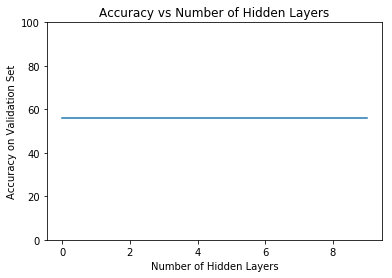

In [59]:
plt.ylim([0,100])
plt.plot(accuracy_validation)
plt.title("Accuracy vs Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy on Validation Set")




In [ ]:
## As we can observe from the above plot, there is no impact of the 'Number of Hidden Layers' 
## on the accuracy of the model

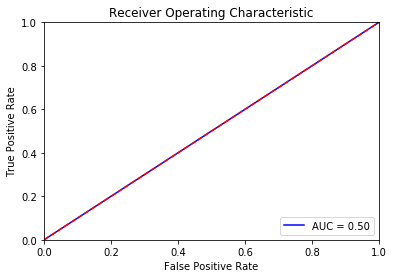

ROC_AUC Score : 0.5


In [61]:
## ROC Error metrics:
predictions = classifier.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )

In [62]:
## Algorithm 1: Neural Networks
## Experiment 2
## No of Nodes in Hidden Layer

In [63]:
accuracy_validation = [None]*10
count = 0
for NoOfNodes in range(5,10):
    
    classifier = Sequential()
    # First Layer + Hidden Layer
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu', input_dim = 10))
    
    # Second Hidden Layer
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu'))

    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 4)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/4
207/207 [==============================] - 1s 5ms/step - loss: 0.6932 - acc: 0.4589
Epoch 2/4
207/207 [==============================] - 0s 194us/step - loss: 0.6930 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 212us/step - loss: 0.6930 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 196us/step - loss: 0.6928 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/4
207/207 [==============================] - 1s 7ms/step - loss: 0.6931 - acc: 0.5314
Epoch 2/4
207/207 [==============================] - 0s 318us/step - loss: 0.6929 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 282us/step - loss: 0.6929 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 320us/step - loss: 0.6925 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=7, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/4
207/207 [==============================] - 1s 6ms/step - loss: 0.6931 - acc: 0.5314
Epoch 2/4
207/207 [==============================] - 0s 175us/step - loss: 0.6929 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 205us/step - loss: 0.6928 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 336us/step - loss: 0.6927 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=8, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/4
207/207 [==============================] - 1s 6ms/step - loss: 0.6933 - acc: 0.4638
Epoch 2/4
207/207 [==============================] - 0s 185us/step - loss: 0.6931 - acc: 0.5024
Epoch 3/4
207/207 [==============================] - 0s 167us/step - loss: 0.6929 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 171us/step - loss: 0.6928 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=9, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=9, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/4
207/207 [==============================] - 1s 7ms/step - loss: 0.6932 - acc: 0.4831
Epoch 2/4
207/207 [==============================] - 0s 189us/step - loss: 0.6931 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 321us/step - loss: 0.6930 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 226us/step - loss: 0.6928 - acc: 0.5314


Text(0,0.5,'Accuracy on Validation Set')

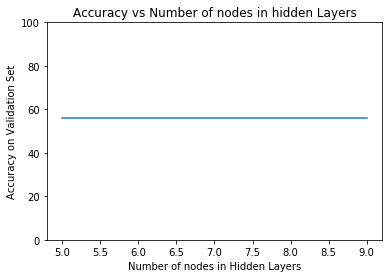

In [65]:
plt.ylim([0,100])
plt.plot(range(5,15),accuracy_validation)
plt.title("Accuracy vs Number of nodes in hidden Layers")
plt.xlabel("Number of nodes in Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

In [ ]:
## From the above plot, there is no impact of 'No, of nodes' on the Accuracy of the model
## We finalize 6 number of Nodes
## Best guess is average of output layer and no of features, that is 11+1 / 2 ~ 6

In [66]:
## Experiment 3
## Changing activation functions (sigmoid, tanh, etc.)

In [67]:
accuracy_validation = [None]*3
count = 0
activationFunc = ['relu','sigmoid','tanh']
for activation_Func in range(len(activationFunc)):
    
    classifier = Sequential()

    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 10))
    
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = activationFunc[activation_Func]))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 4)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/4
207/207 [==============================] - 1s 7ms/step - loss: 3.2072 - acc: 0.4686
Epoch 2/4
207/207 [==============================] - 0s 331us/step - loss: 2.7434 - acc: 0.4686
Epoch 3/4
207/207 [==============================] - 0s 239us/step - loss: 2.7176 - acc: 0.4686
Epoch 4/4
207/207 [==============================] - 0s 185us/step - loss: 2.7121 - acc: 0.4686


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/4
207/207 [==============================] - 2s 8ms/step - loss: 0.6931 - acc: 0.5266
Epoch 2/4
207/207 [==============================] - 0s 208us/step - loss: 0.6930 - acc: 0.5314
Epoch 3/4
207/207 [==============================] - 0s 174us/step - loss: 0.6928 - acc: 0.5314
Epoch 4/4
207/207 [==============================] - 0s 199us/step - loss: 0.6928 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/4
207/207 [==============================] - 2s 8ms/step - loss: 8.5652 - acc: 0.4686
Epoch 2/4
207/207 [==============================] - 0s 165us/step - loss: 8.5652 - acc: 0.4686
Epoch 3/4
207/207 [==============================] - 0s 178us/step - loss: 8.5652 - acc: 0.4686
Epoch 4/4
207/207 [==============================] - 0s 195us/step - loss: 8.5652 - acc: 0.4686


Text(0,0.5,'Accuracy on Validation Set')

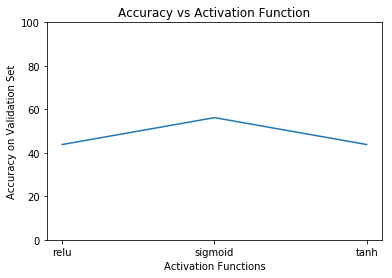

In [68]:
plt.ylim([0,100])
plt.plot(activationFunc,accuracy_validation)
plt.title("Accuracy vs Activation Function")
plt.xlabel("Activation Functions")
plt.ylabel("Accuracy on Validation Set")

In [69]:
## As we can see from the above plot, 'sigmoid' function has the highest accuracy score
## Hence, we use 'sigmoid' activation for the Output Layer

In [70]:
## Experiment 4
## Batch size for error back propagation

In [71]:
accuracy_validation = [None]*10
count = 0
for batchSize in range(5,15):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 10))
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = batchSize, nb_epoch = 3)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
207/207 [==============================] - 2s 10ms/step - loss: 0.6931 - acc: 0.5314
Epoch 2/3
207/207 [==============================] - 0s 329us/step - loss: 0.6928 - acc: 0.5314
Epoch 3/3
207/207 [==============================] - 0s 435us/step - loss: 0.6927 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
207/207 [==============================] - 2s 8ms/step - loss: 0.6931 - acc: 0.5217
Epoch 2/3
207/207 [==============================] - 0s 593us/step - loss: 0.6929 - acc: 0.5314
Epoch 3/3
207/207 [==============================] - 0s 442us/step - loss: 0.6928 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
207/207 [==============================] - 2s 8ms/step - loss: 0.6931 - acc: 0.5169
Epoch 2/3
207/207 [==============================] - 0s 278us/step - loss: 0.6930 - acc: 0.5314
Epoch 3/3
207/207 [==============================] - 0s 292us/step - loss: 0.6927 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
207/207 [==============================] - 2s 8ms/step - loss: 0.6933 - acc: 0.4734
Epoch 2/3
207/207 [==============================] - 0s 274us/step - loss: 0.6931 - acc: 0.5314
Epoch 3/3
207/207 [==============================] - 0s 423us/step - loss: 0.6929 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
207/207 [==============================] - 2s 10ms/step - loss: 0.6933 - acc: 0.4541
Epoch 2/3
207/207 [==============================] - 0s 290us/step - loss: 0.6930 - acc: 0.5314
Epoch 3/3
207/207 [==============================] - 0s 308us/step - loss: 0.6929 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
207/207 [==============================] - 2s 8ms/step - loss: 0.6931 - acc: 0.5314
Epoch 2/3
207/207 [==============================] - 0s 185us/step - loss: 0.6929 - acc: 0.5314
Epoch 3/3
207/207 [==============================] - 0s 235us/step - loss: 0.6928 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
207/207 [==============================] - 2s 8ms/step - loss: 0.6933 - acc: 0.4444
Epoch 2/3
207/207 [==============================] - 0s 198us/step - loss: 0.6931 - acc: 0.5411
Epoch 3/3
207/207 [==============================] - 0s 236us/step - loss: 0.6930 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
207/207 [==============================] - 2s 9ms/step - loss: 0.6932 - acc: 0.4638
Epoch 2/3
207/207 [==============================] - 0s 226us/step - loss: 0.6931 - acc: 0.5024
Epoch 3/3
207/207 [==============================] - 0s 204us/step - loss: 0.6929 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
207/207 [==============================] - 2s 10ms/step - loss: 0.6931 - acc: 0.5362
Epoch 2/3
207/207 [==============================] - 0s 204us/step - loss: 0.6929 - acc: 0.5314
Epoch 3/3
207/207 [==============================] - 0s 193us/step - loss: 0.6928 - acc: 0.5314


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
207/207 [==============================] - 2s 9ms/step - loss: 0.6931 - acc: 0.5362
Epoch 2/3
207/207 [==============================] - 0s 188us/step - loss: 0.6930 - acc: 0.5314
Epoch 3/3
207/207 [==============================] - 0s 192us/step - loss: 0.6929 - acc: 0.5314


Text(0,0.5,'Accuracy on Validation Set')

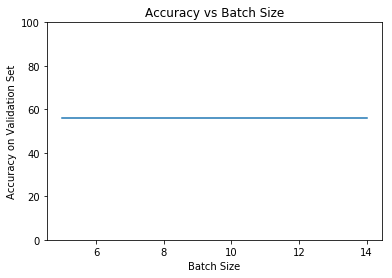

In [72]:
plt.ylim([0,100])
plt.plot(range(5,15),accuracy_validation)
plt.title("Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy on Validation Set")

In [73]:
# I'll select Batch Size = 10, as there are no changes in accuracy


In [75]:

## Final NN after doing Hyper parameter tuning

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  """
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
207/207 [==============================] - 3s 14ms/step - loss: 0.6933 - acc: 0.5314
Epoch 2/20
207/207 [==============================] - 0s 391us/step - loss: 0.6928 - acc: 0.5314
Epoch 3/20
207/207 [==============================] - 0s 519us/step - loss: 0.6928 - acc: 0.5314
Epoch 4/20
207/207 [==============================] - 0s 456us/step - loss: 0.6926 - acc: 0.5314
Epoch 5/20
207/207 [==============================] - 0s 372us/step - loss: 0.6925 - acc: 0.5314
Epoch 6/20
207/207 [==============================] - 0s 398us/step - loss: 0.6926 - acc: 0.5314
Epoch 7/20
207/207 [==============================] - 0s 408us/step - loss: 0.6923 - acc: 0.5314
Epoch 8/20
207/207 [==============================] - 0s 375us/step - loss: 0.6922 - acc: 0.5314
Epoch 9/20
207/207 [==============================] - 0s 406us/step - loss: 0.6922 - acc: 0.5314
Epoch 10/20
207/207 [==============================] - 0s 451us/step - loss: 0.6921 - acc: 0.5314
Epoch 11/20
207/207 [=========

Train accuracy = 53.14%
Test accuracy = 49.49%
Validation accuracy = 56.18%


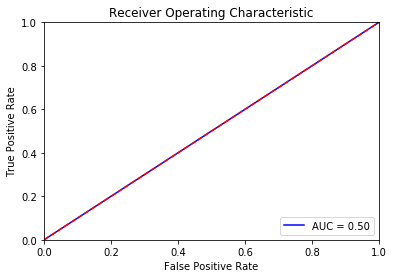

ROC_AUC Score : 0.5


In [76]:
## Metrics of our final model after experimentation

print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))
print('Validation accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)))


## ROC Error metrics:
predictions = classifier.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )


In [ ]:
## 

In [77]:
## KNN Algorithm

In [94]:
from sklearn.neighbors import KNeighborsClassifier


In [115]:
# What k works best? Let's try several ...
for k in range(5,15):
        KNN = KNeighborsClassifier(n_neighbors=k)
        KNN.fit(X_train,y_train)
        print(k, KNN.score(X_test,y_test))

5 0.5050505050505051
6 0.5555555555555556
7 0.5858585858585859
8 0.5454545454545454
9 0.5252525252525253
10 0.5555555555555556
11 0.5252525252525253
12 0.494949494949495
13 0.48484848484848486
14 0.5151515151515151


In [116]:
## We find the k value of 7 (number of neighbors) provides the best accuracy score
## We consider 3 types of Distance metric to verify which is the best one


from sklearn.neighbors import KNeighborsClassifier
metric = ["euclidean","manhattan","hamming"]
accuracy = [None]*3
count=0
for p in range(0,3):
    KNN = KNeighborsClassifier(n_neighbors = 7, metric = metric[p])
    KNN.fit(X_train, y_train)
    accuracy[count] = KNN.score(X_test,y_test)
    count+=1

[0.5454545454545454, 0.6161616161616161, 0.5151515151515151]


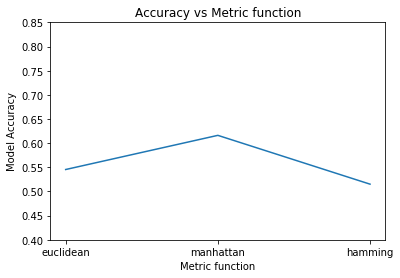

In [119]:
plt.ylim([0.40,0.85])
plt.plot(metric,accuracy)
plt.title("Accuracy vs Metric function")
plt.xlabel("Metric function")
plt.ylabel("Model Accuracy")
print(accuracy)

Training Score:0.7198067632850241
Test Accuracy Score:0.5757575757575758
Confusion Matrix:
[[24 26]
 [16 33]]


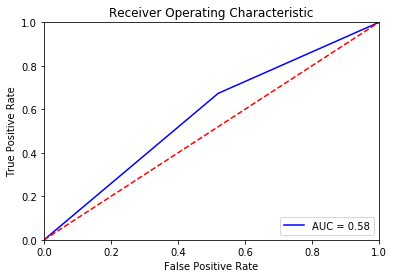

ROC_AUC Score : 0.576734693877551


In [120]:
## "manhattan" distance metric performs the best out of all 3

KNN = KNeighborsClassifier(n_neighbors = 7, metric = metric[1])
KNN.fit(X_train, y_train)
print("Training Score:"+ str(KNN.score(X_train,y_train)))
print("Test Accuracy Score:"+ str(KNN.score(X_test,y_test)))
predictions_knn = KNN.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix:")          
print(confusion_matrix(y_test,predictions_knn))

## ROC Error metrics:

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_knn)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )

In [ ]:
### Accuracy score of KNN (0.5757) is much better than the score of Artificial Neural Networks (0.49) 
## Although the ROC curve shows the error higher than KNN
## The low accuracy in ANN is due to small size of dataset. ANN requires huge dataset for large computations.